# Set up

In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from importlib import reload
# from matplotlib import ticker

from RashbaJunction import (RashbaJunction, PureRashba, EnergyOutOfRangeError, InsulatorError)
from RashbaJunction.utilities import adjuct_Tick, make_grid, error_decorator
from RashbaJunction.ScatteringMatrix import ScatteringMatrix


BASE_PATH = "plots/paper_plots_2/paper/"
FINAL_PATH = BASE_PATH+"fig_final/"


print(BASE_PATH)
print(FINAL_PATH)

plots/paper_plots_2/paper/
plots/paper_plots_2/paper/fig_final/


In [6]:
def expansion(x):
    return x**2/(1 + (x/2)**2)**2

def expansion2(x):
    return 16*np.pi**2*x/E_l/(4 + np.pi**2*x/E_l)**2

## plor set up

In [8]:
font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G / G_0$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
x_label = r"$$E / E_Z$$"

y_label_pos = [(-.02, 1.03), (-.09, 1)]

legend_font_size = 25

region_lbl = ["(a)", "(b)", "(c)"]

#  Fig 7 $T vs E_{so}$

In [2]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

h_xy = 0.1e-3# eV

k_z = np.sqrt(2*m*h_xy*ev_to_j)/cc.hbar# 1/Metr
l_z = 1/k_z
print(f"k_z {k_z}") #1/Metr
print(f"l_z {l_z}m")
print(f"l_z {l_z*10**9:.2f}nm") #Metr


k_z 6274572.777578377
l_z 1.5937340046057163e-07m
l_z 159.37nm


In [3]:
L = 100e-9#m

E_l  = np.pi**2*cc.hbar**2/(2*m*L**2)/ev_to_j


print(E_l, E_l*1e3)

print(k_z * L)
print(np.pi*np.sqrt(h_xy/E_l), np.sqrt(h_xy/E_l))

0.0025068677507782506 2.5068677507782504
0.6274572777578377
0.6274572777578377 0.19972585466828846


In [4]:
alp_r = 10
Eso_profile = [alp_r, 0, -alp_r]
x_profile = [-.31, .31]
junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(ee, par):
    junction[0] = ee/par
    junction[2] = -ee/par 
    junction.interface = [0, np.pi*np.sqrt(par/E_l)]
    
    S = junction.get_scattering_matrix(0)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}, {ee/par}")
        return np.nan
    else:
        return S.t_coef
    
h_p = np.array([0.1, .05, .01, .005])*1e-3

eso = np.arange(0.001, 10, 0.0011)*1e-3

res = make_grid(eso, h_p, [g])

<IPython.core.display.Javascript object>


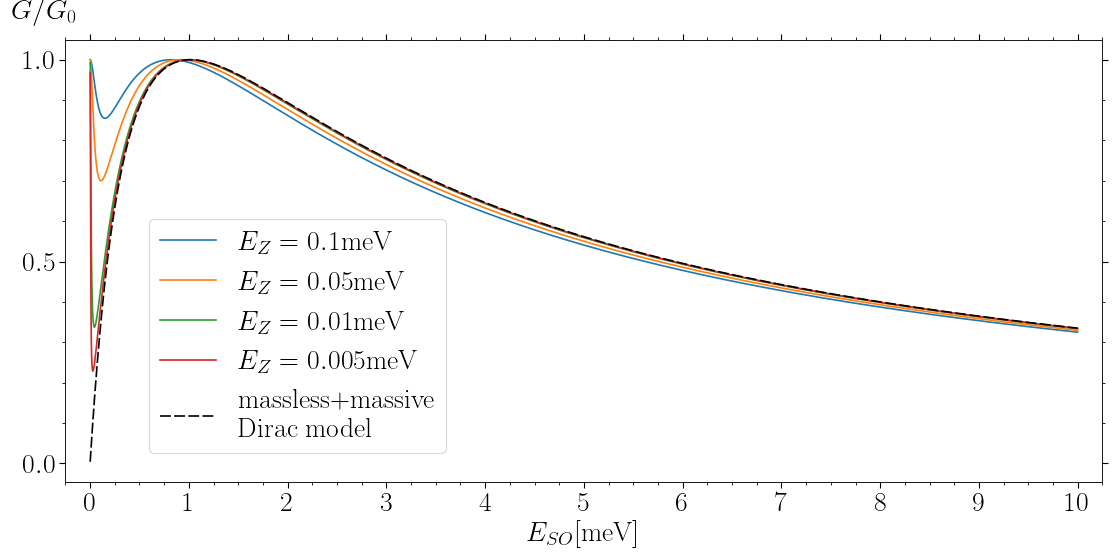

plots/paper_plots_2/paper/T_vs_E_so(expansion)a.pdf


In [9]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

exp_label = "massless+massive\nDirac model"


for j, k in enumerate(res.keys()):
    axs.plot(eso*1e3, res[k][0], label=fr"$E_Z = {k*1e3}$""meV", **next(color_cycle))

    
axs.plot(eso*1e3, [expansion2(e) for e in eso], 
            label=exp_label, 
            dashes=[6.5, 2],
#             linestyle='dashed', 
            color = 'black')



axs.set_xlabel(r"$E_{SO}$""[meV]", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.25])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

from matplotlib import ticker
i = 0
anchor = (0.38, 0.33)
lines_labels = axs.get_legend_handles_labels()
leg = axs.legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor, 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(legend_font_size)

axs.set_xlim(-0.25, 10.25)

# SAVE = True
SAVE = False


save_path = BASE_PATH+"T_vs_E_so(expansion)a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()


<IPython.core.display.Javascript object>


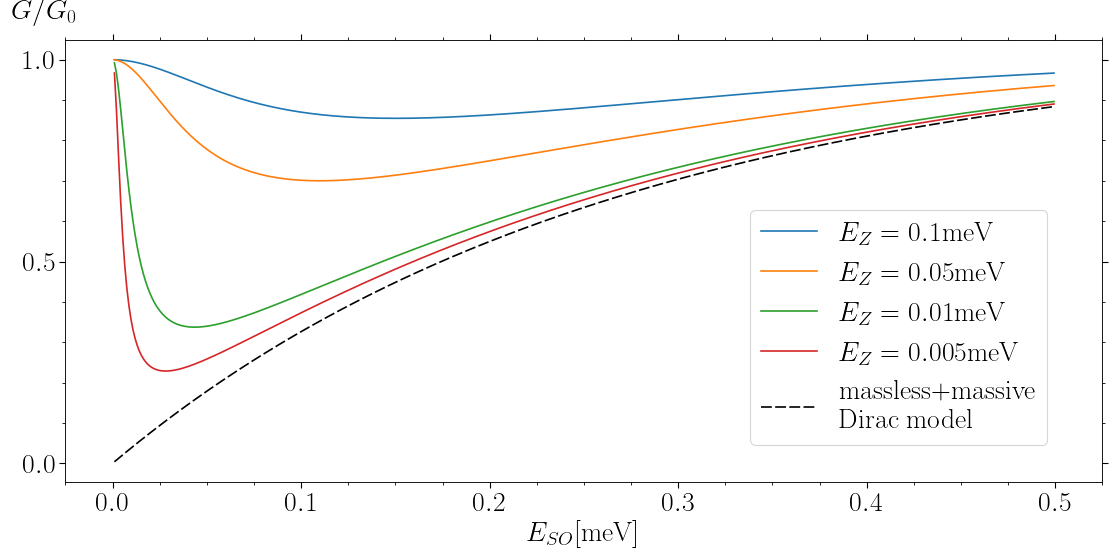

plots/paper_plots_2/paper/T_vs_E_so(expansion)b.pdf


In [10]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

exp_label = "massless+massive\nDirac model"

ind, = np.where(np.isclose(0.5, eso*1e3, rtol = 1e-3))[0]
for j, k in enumerate(res.keys()):
    axs.plot((eso*1e3)[:ind], res[k][0][:ind], label=fr"$E_Z = {k*1e3}$""meV")

axs.plot((eso*1e3)[:ind], [expansion2(e) for e in eso[:ind]], 
            label=exp_label, 
            dashes=[6.5, 2],
            color = 'black')

axs.set_xlabel(r"$E_{SO}$""[meV]", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.1])
x_minor = np.array([0.025])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

from matplotlib import ticker
i = 0
anchor = (0.96, 0.35)
lines_labels = axs.get_legend_handles_labels()
leg = axs.legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor, 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(legend_font_size)

    
axs.set_xlim(-0.025, 0.525)

# SAVE = True
SAVE = False


save_path = BASE_PATH+"T_vs_E_so(expansion)b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# Fig 6 $T vs k_{SO} d$

<IPython.core.display.Javascript object>


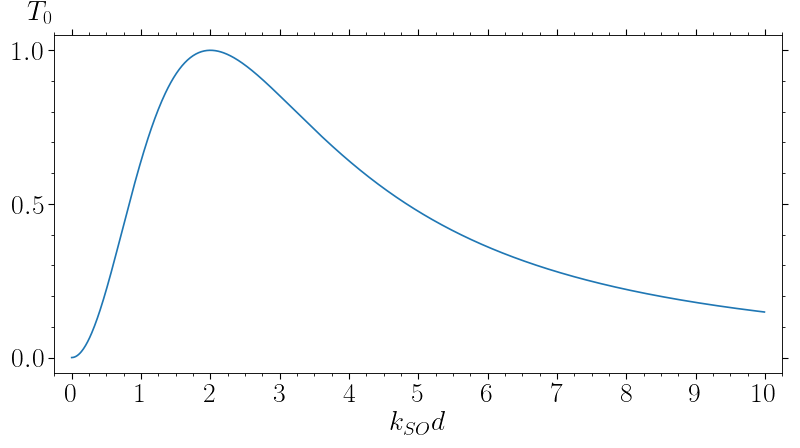

plots/paper_plots_2/paper/transmission_coefficient.pdf


In [11]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'

# (14, 7)
fig, axs = plt.subplots(1, 1, figsize=(10, 5.6), dpi=100, tight_layout=True, facecolor='white')


axs.plot(np.arange(0, 10, 0.01), [expansion(e) for e in np.arange(0, 10, 0.01)])#, linestyle='dashedl')


x_magior = np.array([1])
x_minor = np.array([0.25])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


axs.set_xlabel(r"$k_{SO} d$", fontdict=font)
# axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.set_ylabel(r"$T_0$", rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
    
axs.set_xlim(-0.25, 10.25)

# SAVE = True
SAVE = False


save_path = BASE_PATH+"transmission_coefficient.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()